### Praca z plikami

Do pracy z plikami w pythonie służy wbudowana funkcja [`open`](https://docs.python.org/3/library/functions.html#open). 

#### Funkcja [`open`](https://docs.python.org/3/library/functions.html#open)

Funkcja [`open`](https://docs.python.org/3/library/functions.html#open) przyjmuje jeden parametr obowiązkowy - nazwa pliku oraz szereg parametrów opcjonalnych, w tym:
* mode - tryb, w którym otwieramy plik
* ecoding - kodowanie pliku

Zwraca obiekt pliku, który jest referencją do otwartego pliku.

##### Tryb otwarcia pliku

W Pythonie istnieje obecnie 7 trybów w jakich możemy otworzyć plik:

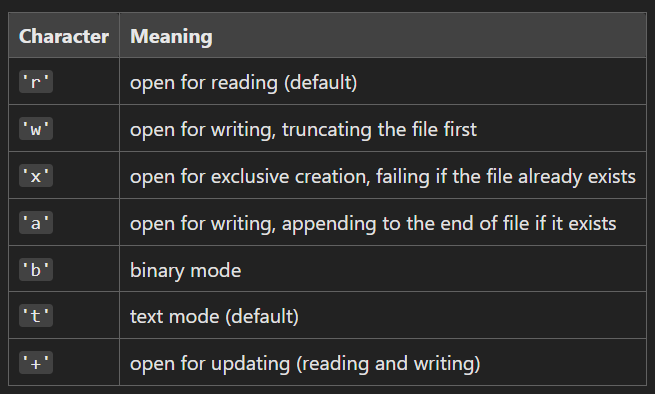
(źródło: https://docs.python.org/3/library/functions.html#open)

##### Kodowanie znaków w pliku

Dla języka polskiego istnieje [kilka podstawowych kodowań](https://www.ia.pw.edu.pl/~jurek/js/kody/), które należy kojarzyć z racji ich popularności:

1. **Latin-2 ([`ISO-8859-2`](https://en.wikipedia.org/wiki/ISO/IEC_8859-2))**:

<u>Opis</u>\
Jest to kodowanie znaków używane dla języków środkowoeuropejskich, w tym polskiego, czeskiego, słowackiego, węgierskiego i innych. Zawiera wszystkie polskie znaki diakrytyczne, takie jak ą, ć, ę, ł, ń, ó, ś, ź, ż.

<u>Zastosowanie</u>\
Było szeroko stosowane w Europie Środkowej i Wschodniej przed wprowadzeniem Unicode.

2. **cp1250 ([`windows-1250`](https://en.wikipedia.org/wiki/Windows-1250))**:

<u>Opis</u>\
Jest to kodowanie znaków używane przez systemy operacyjne Microsoft Windows dla języków środkowoeuropejskich. Podobnie jak ISO-8859-2, zawiera wszystkie polskie znaki diakrytyczne.

<u>Zastosowanie</u>\
Było popularne w środowisku Windows przed upowszechnieniem Unicode.

3. **UTF-8 ([`utf-8`](https://en.wikipedia.org/wiki/UTF-8))**:

<u>Opis</u>\
Jest to jedno z najbardziej popularnych kodowań Unicode, które używa od 1 do 4 bajtów do reprezentowania każdego znaku. UTF-8 jest w pełni kompatybilne z ASCII i może reprezentować wszystkie znaki z Unicode, w tym polskie litery.

<u>Zastosowanie</u>\
Jest to obecnie najczęściej używane kodowanie na stronach internetowych i w nowoczesnych aplikacjach, dzięki swojej kompletności, elastyczności i kompatybilności z ASCII.

Przegląd wszystkich dostępnych w Pythonie kodowań można znaleźć na przykład tutaj: https://docs.python.org/3/library/codecs.html#standard-encodings

#### Popatrzmy

#### 1. Odczytywanie z pliku

In [3]:
# otwórz plik 'textfile.txt'
file_obj = open('textfile.txt')
file_obj

<_io.TextIOWrapper name='textfile.txt' mode='r' encoding='utf-8'>

In [4]:
# jakiej klasy jest obiekt pliku ?
type(file_obj)

_io.TextIOWrapper

Co potrafi objekt klasy [`TextIOWrapper`](https://docs.python.org/3/library/io.html#io.TextIOWrapper) ?

In [5]:
# przestrzeń nazw klasy TextIOWrapper
print(dir(file_obj))

['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']


Do podstawowych metod klasy `TextIOWrapper` należą:

| **Funkcja**             | **Opis**                                                                                                     |
|-------------------------|--------------------------------------------------------------------------------------------------------------|
| `read(size=-1)`         | Czyta do `size` znaków z pliku. Jeśli `size` jest pominięty lub ujemny, czyta cały plik.                      |
| `readline(size=-1)`     | Czyta pojedynczą linię z pliku. Jeśli `size` jest określony, czyta do `size` znaków.                          |
| `readlines(hint=-1)`    | Czyta wszystkie linie z pliku i zwraca je jako listę. Jeśli `hint` jest określony, czyta linie do momentu, gdy całkowity rozmiar (w bajtach/znakach) wynosi około `hint`. |
| `write(s)`              | Zapisuje string `s` do pliku.                                                                                |
| `writelines(lines)`     | Zapisuje listę stringów do pliku.                                                                            |
| `close()`               | Zamyka plik. Dalsze operacje I/O na pliku spowodują błąd `ValueError`.                                       |


Odczytajmy zawartość plik

In [6]:
# wczytujemy pełną zawartość pliku
content = file_obj.read()
content

"This text file contains several lines of text. Each line varies in length and content.\n\nYou can use this file to practice reading, writing, and manipulating text using Python's file handling functions.\n\nHappy coding!\n"

In [7]:
print(content)

This text file contains several lines of text. Each line varies in length and content.

You can use this file to practice reading, writing, and manipulating text using Python's file handling functions.

Happy coding!



Po odczytaniu zawartości pliku nie da się go ponownie odczytać bez podjęcia dodatkowych czynności.

In [8]:
# próba ponownego odczytania tego samego obiektu podnosi
content = file_obj.read()
content

''

Należy go ponownie otworzyć. Ale przed ponownym otwarciem pliku zróbmy porządek z poprzednim, wysyconym, ale **wciąż otwartym** obiektem pliku.

**Zapamiętaj!**

Po zakończeniu pracy z obiektem pliku należy go zamknąć.

Zamknąć obiekt pliku można na dwa sposoby:
- metodą [`close`](https://docs.python.org/3/library/io.html#io.IOBase.close)
- automatycznie, poprzez użycie funkcji `open` jako menadżera kontekstu (*ang. context manager*)

Zalecanym sposobem jest używanie funkcji `open` jako menadżera kontekstu.

Pierwszy i ostatni raz użyjmy bezpośrednio metody `close`.

In [9]:
# zamykamy obiekt pliku
file_obj.close()

Ok, obiekt pliku jest teraz zamknięty.

Od teraz używajmy funkcji `open` jako menadżera kontekstu.

Wczytajmy zawartość pliku jako listę linii za pomocą metody [`readlines`](https://docs.python.org/3/library/io.html#io.IOBase.readlines).

In [10]:
# użycie funkcji `open` jako menadżera kontekstu, wczytujemy zawartość pliku jako listę linii
with open('textfile.txt') as file_obj:
    content = file_obj.read()

print(content)

This text file contains several lines of text. Each line varies in length and content.

You can use this file to practice reading, writing, and manipulating text using Python's file handling functions.

Happy coding!



Wczytajmy zawartość pliku linia za linią za pomocą metody [`readline`](https://docs.python.org/3/library/io.html#io.IOBase.readline).

In [13]:
# wczytujemy linia po linii
with open('textfile.txt') as file_obj:
    line = file_obj.readline()
    line2 = file_obj.readline()
    line3 = file_obj.readline()

print(line)
print(line2)
print(line3)

# dodatkowe nowe linie pojawiają sie z tego powodu, że funkcja print po wywołaniu zawsze umieszcza 
# znak nowej linii na końcu wyświetlanego napisu (można to zachowanie kontrolować parametrem `end`).

This text file contains several lines of text. Each line varies in length and content.



You can use this file to practice reading, writing, and manipulating text using Python's file handling functions.



In [14]:
with open('textfile.txt') as file_obj:
    line = file_obj.readline()
    while line:
        print(line, end='')
        line = file_obj.readline()

This text file contains several lines of text. Each line varies in length and content.

You can use this file to practice reading, writing, and manipulating text using Python's file handling functions.

Happy coding!


#### 2. Zapisywanie do pliku (+ tryby otwierania pliku)

Zapiszmy jeszcze coś do pliku.

Metodą [`write`](https://docs.python.org/3/library/io.html#io.RawIOBase.write).

In [15]:
# Zapisujemy do pliku (bez flagi)
with open('output.txt') as file:
    file.write('Ala ma kota')

FileNotFoundError: [Errno 2] No such file or directory: 'output.txt'

Nie działa!

Dlaczego? \
Błąd mówi, że nie ma takiego pliku. Ale przecież my dopiero chcemy stworzyć taki plik.

Błąd wynika z faktu, że plik otwieramy w trybie do odczytu (w takim trybie domyślnie otwierany jest plik metodą `open`). Czyli python myśli, że chcemy coś odczytać z pliku. Szuka tego pliku, nie znajduje i rzuca wyjątek FileNotFoundError. Jeżeli chcemy zmienić tryb w jakim otwieramy plik należy użyć opcjonalnego parametry `mode` funkcji `open`. W przypadku otwierania pliku do zapisu wartość tego parametry powinna wynosić 'w'.

In [16]:
# Zapisujemy do pliku (z flagą)
with open('output.txt', 'w') as file:
    file.write('Ala ma kota')

Teraz działa.

Popatrzmy jeszcze na funkcje [`writelines`](https://docs.python.org/3/library/io.html#io.IOBase.writelines)

In [19]:
# Zapisujemy do pliku listę napisów
with open('output2.txt', 'w', encoding='UTF-8') as file:
    file.writelines(['Ala ma kota', 'Kot ma Alę'])

Widzimy, że metoda `writelines` sama nie dodaje znaku nowej linii na końcu każdej linii. Jeżeli chcemy mieć każdy element w nowej linii należy samodzielnie zadbać o znak nowej linii.

In [20]:
# Zapisujemy do pliki listę napisów (ze znakami nowej linii)
with open('output2.txt', 'w', encoding='UTF-8') as file:
    file.writelines(['Ala ma kota' + '\n', 'Kot ma Alę' + '\n'])

#### 3. Kodowanie pliku

Na koniec popatrzmy jeszcze na kodowanie pliku. Ten temat jest zależny od platformy, której używamy. A dokładniej otrzymamy inne wyniki na systemach Unix (czyli między innymi Linux i Mac), a inne na Windows. Unix od lat w pełni wspiera Unicode, więc problem, który tutaj omówimy nie dotyczy systemów tej klasy (chociaż sam temat kodowania jest oczywiście istotny niezależnie od platformy na której pracujemy).

Niemniej kod z prezentowanego poniżej przykładu będzie zachowywał się zgodnie z opisami zawartymi w treści tylko przy uruchamianiu go na systemie Windows.

Zapiszmy plik tekstowy używając polskich znaków - `encoding1.txt`

In [26]:
# Wczytujemy plik z polskimi znakami
with open('polish_letters.txt', encoding='cp1250') as file:
    content = file.read()

print(content)

ZaĹĽĂłĹ‚ciÄ‡ gÄ™Ĺ›lÄ… jaĹşĹ„


Na systemach Unix wszystko wczytane zostanie prawidłowo (o ile tylko plik, który wczytujemy też stworzyliśmy w systemie unix). Niestety uruchamiając te linijki w Windows, w zależności od ustawień lokalnych oraz wersji Pythona, możemy dostać krzaki. Dlaczego?

System Windows ma swoje kodowanie, które wciąż wspiera podczas gdy wszyscy inni przełączyli się już kilkanaście lat temu na Unicode. Domyślnym kodowaniem w Windows jest cp-1250. W zależności od wersji Pythona i lokalnych ustawień systemowych, Python uruchomiony na systemie Windows może mieć to kodowanie ustawione domyślnie.

Lokalne ustawienia systemowe (włącznie z kodowaniem) łatwo sprawdzić z pomocą biblioteki `local`.

In [23]:
# Sprawdzamy ustawienia lokalne kodowania
import locale
print(locale.getpreferredencoding())

utf-8


U mnie jest to kodowanie cp1250. I to jest domyślne kodowanie, z którym python wczytuje u mnie pliki tekstowe.

Problem w tym, że wiele programów (również tych uruchamianych na systemie Windows) domyślnie zapisuje pliki z kodowaniem 'utf-8'. Tak też stało się i tutaj, gdzie zapisywałem plik w notatniku jupyter.

A Python próbuje wczytać ten plik z kodowaniem cp1250. I stąd krzaki. Jak to zmienić?

Do wskazania kodowania pliku służy opcjonalny parametr `encoding`.

In [25]:
# Wczytujemy plik używając kodowania `utf-8`
with open('polish_letters.txt', encoding='utf-8') as file:
    content = file.read()

print(content)

Zażółcić gęślą jaźń


A co z zapisem ?

Analogicznie. \
Python zapisze w kodowaniu cp1250, a wszystkie popularne programy będą próbowały je wczytać używając kodowania utf-8. Zobaczymy krzaki lub błąd.

In [27]:
# Zapisujemy do pliku napis z polskimi znakami
with open('polish_letters_out.txt', 'w', encoding='cp1250') as file:
    file.write('Zażółcić gęślą jaźń')

Używając parametru `encoding` jesteśmy w stanie temu zapobiec.

In [28]:
# Zapisujemy używając kodowowania `utf-8`
with open('polish_letters_out.txt', 'w', encoding='utf-8') as file:
    file.write('Zażółcić gęślą jaźń')

**Ciekawostka** \
W różnych programach podczas zapisywania pliku tekstowego możemy wybrać w jakim kodowaniu ma być ten plik zapisany. Na przykład w programach Notepad lub Notepad++, żeby plik zapisać w kodowaniu cp1250 należy w oknie 'Zapisz jako' wybrać kodowanie ANSI, a następnie zapisać plik. Plik `encoding4.txt` zapisałem właśnie w ten sposób. Popatrzmy na wyniki.

In [ ]:
with open('encoding4.txt') as f:
    text = f.read()

print(text)

Teraz działa, ponieważ Python u mnie, domyślnie wczytuje pliki z kodowaniem 'cp-1250', a plik został właśnie w tym kodowaniu zapisany.

Natomiast próba wczytania pliku w kodowaniu 'utf-8' zakończy się błędem.

In [ ]:
with open('encoding4.txt', encoding='utf-8') as f:
    text = f.read()

print(text)